In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
x = np.array([7, 6, 5, 4, 3, 2, 1])
print(x)
print('----------------')
print(np.partition(x, 0))
print(np.partition(x, 1))
print(np.partition(x, 2))
print(np.partition(x, 3))
print(np.partition(x, 4))

[7 6 5 4 3 2 1]
----------------
[1 6 5 4 3 2 7]
[1 2 5 4 3 6 7]
[1 2 3 4 5 6 7]
[3 1 2 4 6 5 7]
[3 1 2 4 5 6 7]


In [3]:
rand = np.random.RandomState(0)
X = rand.randint(0, 10, (4, 6))
X

array([[5, 0, 3, 3, 7, 9],
       [3, 5, 2, 4, 7, 6],
       [8, 8, 1, 6, 7, 7],
       [8, 1, 5, 9, 8, 9]])

In [4]:
np.partition(X, 1, axis=1)

array([[0, 3, 5, 3, 7, 9],
       [2, 3, 5, 4, 7, 6],
       [1, 6, 8, 8, 7, 7],
       [1, 5, 8, 9, 8, 9]])

ex: knn

In [5]:
X = rand.rand(10, 2)
X

array([[0.64817187, 0.36824154],
       [0.95715516, 0.14035078],
       [0.87008726, 0.47360805],
       [0.80091075, 0.52047748],
       [0.67887953, 0.72063265],
       [0.58201979, 0.53737323],
       [0.75861562, 0.10590761],
       [0.47360042, 0.18633234],
       [0.73691818, 0.21655035],
       [0.13521817, 0.32414101]])

In [6]:
np.sum(X,1)

array([1.01641341, 1.09750594, 1.3436953 , 1.32138823, 1.39951218,
       1.11939302, 0.86452323, 0.65993276, 0.95346853, 0.45935918])

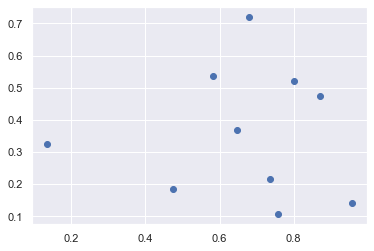

In [7]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling

plt.scatter(X[:, 0], X[:, 1])

In [8]:
dist_sq = np.sum((X[:, None, :] - X[None, :, :]) ** 2, axis=-1)
dist_sq

array([[0.        , 0.14740487, 0.06034854, 0.04650495, 0.12512246,
        0.03298163, 0.08101691, 0.06356615, 0.03088612, 0.26506635],
       [0.14740487, 0.        , 0.11864122, 0.16890862, 0.41416438,
        0.29835337, 0.04060428, 0.23593949, 0.0543107 , 0.70935926],
       [0.06034854, 0.11864122, 0.        , 0.00698213, 0.09758155,
        0.08704886, 0.14762954, 0.23972914, 0.08381266, 0.56237297],
       [0.04650495, 0.16890862, 0.00698213, 0.        , 0.05495371,
        0.04819872, 0.17365706, 0.21878503, 0.09646675, 0.48169462],
       [0.12512246, 0.41416438, 0.09758155, 0.05495371, 0.        ,
        0.04296583, 0.38424473, 0.32761634, 0.25746745, 0.4527733 ],
       [0.03298163, 0.29835337, 0.08704886, 0.04819872, 0.04296583,
        0.        , 0.21734867, 0.13498446, 0.12692083, 0.24509967],
       [0.08101691, 0.04060428, 0.14762954, 0.17365706, 0.38424473,
        0.21734867, 0.        , 0.08770181, 0.0127126 , 0.4362502 ],
       [0.06356615, 0.23593949, 0.2397291

In [9]:
dist_sq[0]

array([0.        , 0.14740487, 0.06034854, 0.04650495, 0.12512246,
       0.03298163, 0.08101691, 0.06356615, 0.03088612, 0.26506635])

In [10]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 8 5 3 2 7 6 4 1 9]
 [1 6 8 2 0 3 7 5 4 9]
 [2 3 0 8 5 4 1 6 7 9]
 [3 2 0 5 4 8 1 6 7 9]
 [4 5 3 2 0 8 7 6 1 9]
 [5 0 4 3 2 8 7 6 9 1]
 [6 8 1 0 7 2 3 5 4 9]
 [7 0 8 6 9 5 3 1 2 4]
 [8 6 0 1 7 2 3 5 4 9]
 [9 7 5 0 8 6 4 3 2 1]]


In [12]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
print(nearest_partition)

[[0 8 5 3 2 7 6 4 1 9]
 [1 6 8 2 0 3 5 7 4 9]
 [3 2 0 8 5 4 6 7 1 9]
 [2 3 0 5 4 1 6 7 8 9]
 [4 5 3 2 0 1 6 7 8 9]
 [5 0 4 3 2 8 7 6 1 9]
 [6 8 1 0 7 5 2 3 4 9]
 [7 0 8 6 9 5 1 3 2 4]
 [6 8 0 1 7 5 2 3 4 9]
 [5 9 7 0 1 3 6 2 8 4]]


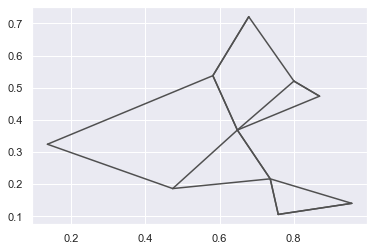

In [13]:
#plt.scatter(X[:, 0], X[:, 1])

# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        plt.plot(*zip(X[j], X[i]), color="#505050")